**Concept of Word2Vec**

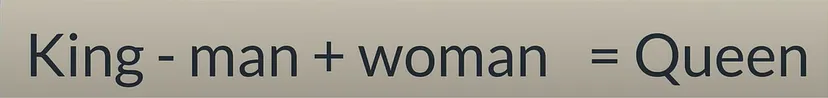

We can see that the angle between the **king** and **queen** vectors, and between the **man** and **woman** vectors, is very small, meaning that the similarity is near one.

Another cool thing about these word vectors is that you can mathematically construct word analogies.

So you can take the word vector for **king**, and subtract the word vector for **man**, thats what this dotted line represents, and then you can add the word vector for **woman** to that, that’s what this dotted green line represents, and you get the exact word vector for **queen**.



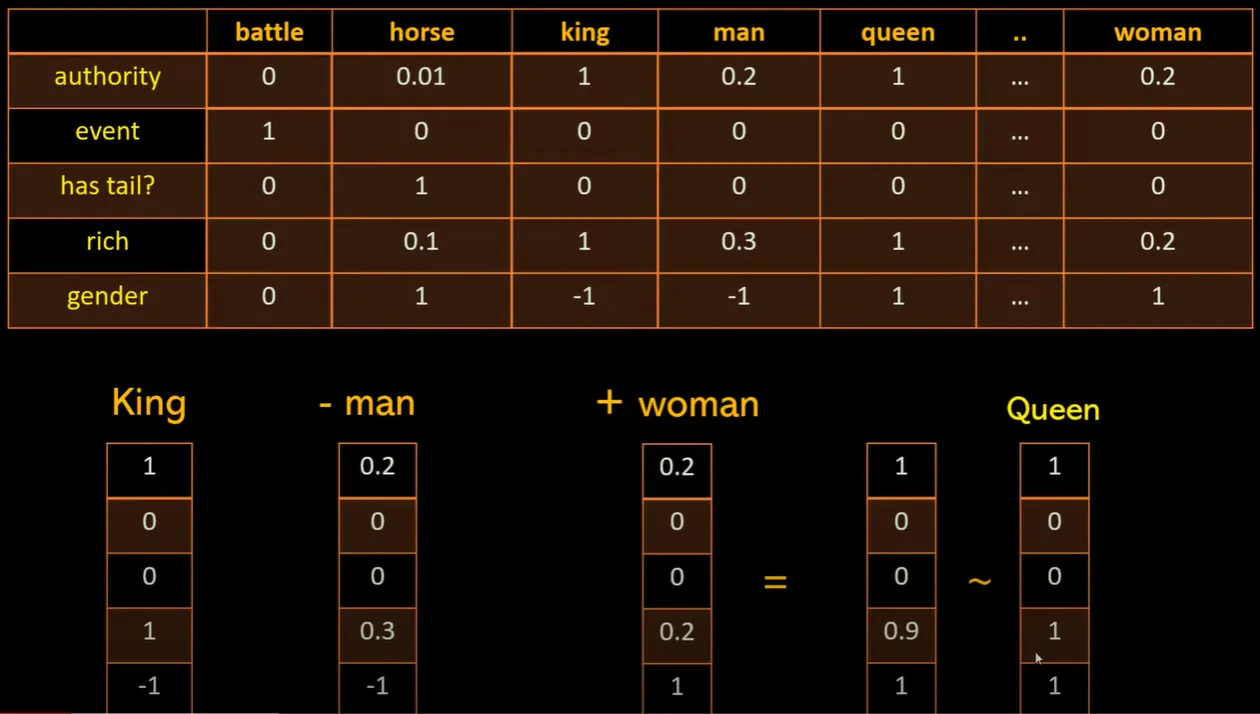

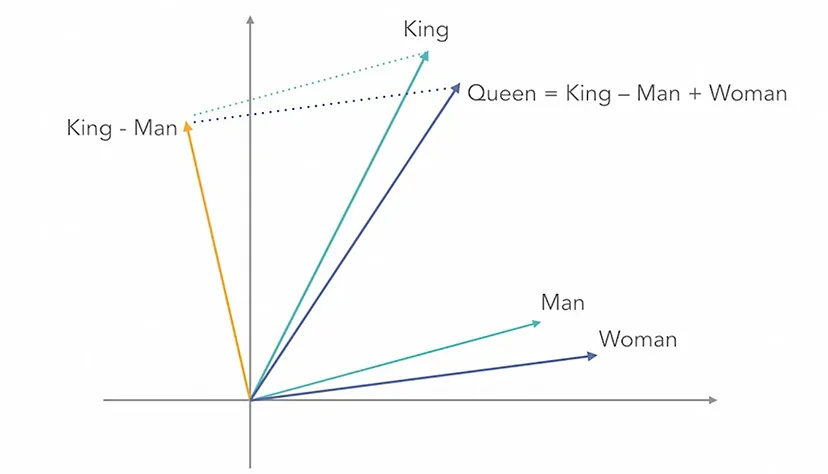

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [ ]:
# Train the Word2Vec model
sentences = [sentence.split() for sentence in X_train]
len(sentences)

40000

In [ ]:
#sentences[0]

**size** - size of the vectors we want

**window** - number words before and after the focus word that it’ll consider as context for the word

**min_count** - the number of times a word must appear in our corpus in order to create a word vector.

In [ ]:
w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4)
w2v_model
# default vector size =100

In [ ]:
 len(w2v_model.wv['king'])

100

In [ ]:
w2v_model.corpus_total_words

4909013

In [ ]:
w2v_model.wv['good']

array([-3.4875197 , -0.49285665, -0.5574474 , -1.5697336 , -1.566729  ,
        0.7710634 ,  0.14544046,  0.43272498, -1.9183277 , -0.09722184,
       -0.6923074 ,  0.57944643, -0.7640464 ,  0.43099454, -0.83019716,
       -0.79808944, -2.6484904 ,  1.4625328 ,  1.3030894 , -1.9428475 ,
        1.5167134 , -0.36576596,  1.1755718 ,  0.90434635, -0.32360387,
        1.3487542 ,  0.56138843, -1.0133168 ,  0.52807033,  0.37927973,
        1.0407425 ,  0.05632415,  1.3257519 , -2.4423177 ,  1.1302959 ,
       -0.85205   , -0.8646265 , -0.19433977, -0.03709116,  1.5930765 ,
        1.6128613 , -1.9427443 , -0.1097806 , -0.20954257,  0.7646487 ,
       -0.9439238 ,  1.8232895 ,  0.97349584,  3.4971685 , -0.08107027,
        0.8760778 , -0.1041117 ,  1.1337668 , -0.375405  ,  0.18214068,
        0.77326787,  0.18570873, -0.5225656 , -1.3268437 ,  0.74583346,
       -0.07291199, -1.167465  ,  1.409725  ,  0.2302648 ,  1.1744374 ,
       -1.3951638 , -1.7551328 ,  1.5370421 , -2.4932158 , -1.42

words and vectors are ready

now we need to apply our entire IMDB data

IMDB data has sentences

will divide sentences into words

if that words is present in word2vec corpus words, then take the vector

other wise create zeros :  100

we are making our vetors values follows normal distribution

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
X_train

array([[-0.2175317 , -0.01577758, -0.28129667, ..., -0.22637348,
         0.02357836, -0.11499496],
       [-0.38095993,  0.26054677, -0.38907468, ..., -0.18700446,
         0.36892644,  0.01622834],
       [-0.07324207,  0.31958258, -0.25434   , ..., -0.1567662 ,
         0.01335562, -0.12557718],
       ...,
       [-0.54025376,  0.22640626, -0.47463638, ..., -0.55514383,
         0.5149265 , -0.27207023],
       [-0.1520919 ,  0.19746286, -0.40588364, ...,  0.1557377 ,
        -0.0241629 , -0.31732407],
       [-0.7054488 ,  0.28674474, -0.2872601 , ...,  0.14160162,
         0.03845504, -0.30477515]], dtype=float32)

In [ ]:
len(X_train[0]),len(X_train)

(100, 40000)

In [ ]:
# Train a classification model
clf = LogisticRegression()
clf.fit(X_train, y_train)
# Evaluate the model
y_pred = ##########

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label='positive'))
print('Recall:', recall_score(y_test, y_pred, pos_label='positive'))
print('F1 score:', f1_score(y_test, y_pred, pos_label='positive'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8574
Precision: 0.8500290641348576
Recall: 0.8706092478666402
F1 score: 0.8601960784313726


In [ ]:
X_test='movie direction is good, but not a good story'
X_test = preprocess(X_test)
X_test = np.array([vectorize(X_test)])
print(len(X_test))
clf.predict(X_test)

1


array(['negative'], dtype=object)

In [ ]:
problem ======= solution approach
text  preprocess vectors

vectors :  word2vec   glove  fasttext   bert   gpt